# Centrality Measures - Part3

###### This time we apply all 15 measures in the same network, for all 6 networks. We also make a Correlation Matrix
###### The function that receives one network and makes all the analysis can be used with any network. For big networks is advised to comment the plots and keep only the correlation matrix.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import statistics as st
from networkx.algorithms import community 
import pandas as pd
import seaborn as sn

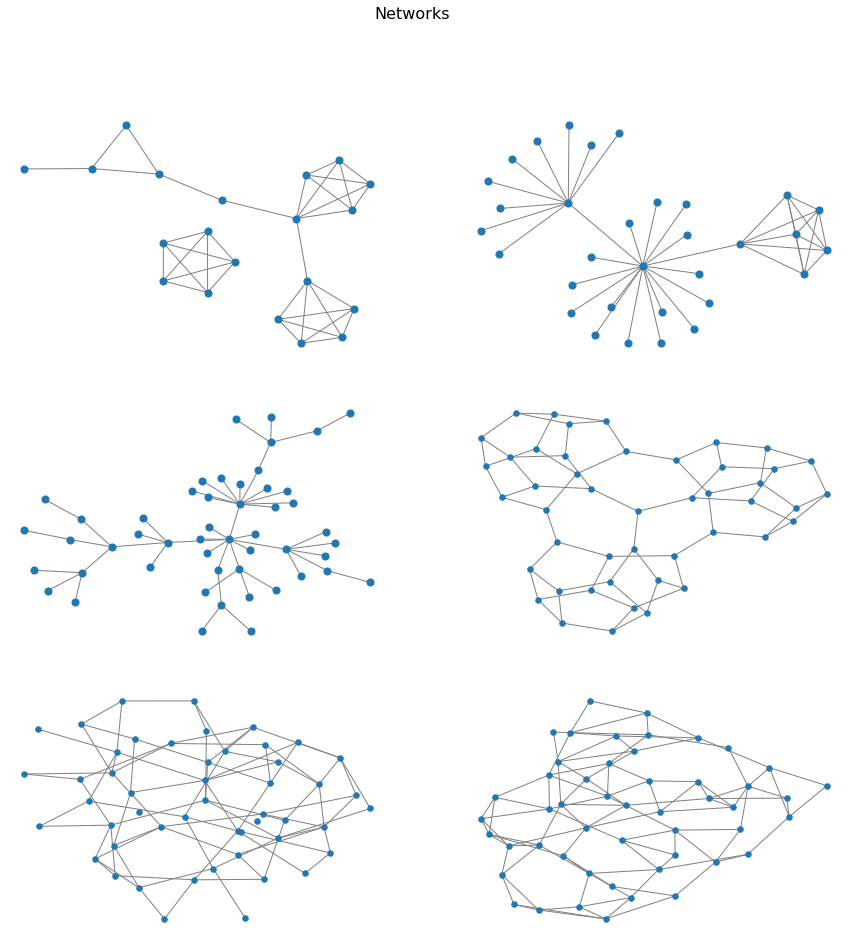

In [2]:
visualNetworks = {}
G = nx.lollipop_graph(5,5)
G = nx.disjoint_union(G, nx.complete_graph(range(10,15)))
G = nx.disjoint_union(G, nx.complete_graph(range(15,20)))
G.add_edges_from([(4,5),(6,8),(6,7),(4,19)])
visualNetworks["network1"] = G

G = nx.complete_graph(range(0,6))
nx.add_star(G, range(6,16))
nx.add_star(G, range(16,32))
G.add_edges_from([(16,6),(16,0)])
visualNetworks["network2"]=G
visualNetworks["network3"]=nx.barabasi_albert_graph(50,1)
visualNetworks["network4"] = nx.tutte_graph() 
visualNetworks["network5"]=nx.erdos_renyi_graph(50,0.08)
visualNetworks["network6"]=nx.watts_strogatz_graph(50,4,0.2)
fig, ax = plt.subplots(3,2,figsize=(15, 15))
fig.suptitle("Networks", fontsize=16)

plt.sca(ax[0,0])
ax[0,0] = nx.draw_kamada_kawai(visualNetworks["network1"],edge_color='gray',with_labels=0, node_size=50)
plt.sca(ax[0,1])
ax[0,1] = nx.draw_kamada_kawai(visualNetworks["network2"],edge_color='gray',with_labels=0, node_size=50)
plt.sca(ax[1,0])
ax[1,0] = nx.draw_kamada_kawai(visualNetworks["network3"],edge_color='gray',with_labels=0, node_size=50)
plt.sca(ax[1,1])
ax[1,1] = nx.draw_kamada_kawai(visualNetworks["network4"],edge_color='gray',with_labels=0, node_size=30)
plt.sca(ax[2,0])
ax[2,0] = nx.draw_kamada_kawai(visualNetworks["network5"],edge_color='gray',with_labels=0, node_size=30)
plt.sca(ax[2,1])
ax[2,1] = nx.draw_kamada_kawai(visualNetworks["network6"],edge_color='gray',with_labels=0, node_size=30)

plt.show()

# Functions

In [3]:
### Measures that are not in NetworkX ###

#leverage centrality can assign negative values to a node, indicating that node has less connections than its neighbours. In this case, a node is said to be influenced by its neighbours.
def levarageCentrality(G):
    nodes = list(G.nodes)
    degrees = G.degree
    leverageCentrality ={}
    for node in nodes:
        if(len(list(G.neighbors(node)))==0):
            leverageCentrality[node] = 0
        else:
            leverage=0
            for n in G.neighbors(node):
                leverage += (degrees[node]-degrees[n]) / (degrees[node]+degrees[n])

            leverageCentrality[node] = round(((1/degrees[node]) * leverage),4)

    return leverageCentrality

def averageNeighborDegree(G):
    nodes = list(G.nodes)
    degrees = G.degree
    avgDegree = st.mean([t[1] for t in degrees])
    averageNeighborDegree ={}
    for node in nodes:
        neighborsDegree=0
        if(len(list(G.neighbors(node)))==0):
            averageNeighborDegree[node] = 0
        else:
            for n in G.neighbors(node):
                neighborsDegree += degrees[n]

            averageNeighborDegree[node] = neighborsDegree/len(list(G.neighbors(node)))

    return averageNeighborDegree

def bridgingCentrality(G):
    nodes = list(G.nodes)
    degrees = G.degree
    #betweenness
    bet = nx.betweenness_centrality(G)
    #bridging centrality
    bridging_centrality={}

    for node in nodes:
        if(degrees[node]!=0):
            nodeDegreeInverse = degrees[node]**-1
            neighborsDegreeInverse=0
            for n in G.neighbors(node):
                neighborsDegreeInverse += degrees[n]**-1

            bridging_centrality[node] = (nodeDegreeInverse/neighborsDegreeInverse) * bet[node]
        else:
            bridging_centrality[node] = 0
    return bridging_centrality


def pacticipantionCefficient(G):
# Ref: https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0012200
# Ref2: https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0220061

    pacticipantionCefficient={}
    communities = community.greedy_modularity_communities(G)
    numberOfModules = len(communities)
    for node in G.nodes:  
        neighbors = list(G.neighbors(node))
        #Avoid CC of size one
        if(len(neighbors)!=0):            
            pacticipantionCefficient[node]=0
            for com in communities:  
                neighborsInComunities=0
                for n in neighbors:
                    if n in com:
                        neighborsInComunities+=1
                if(neighborsInComunities>0):
                    pacticipantionCefficient[node]+=( (neighborsInComunities/len(neighbors) )**2)

            pacticipantionCefficient[node] = 1-pacticipantionCefficient[node] 
        else:
            pacticipantionCefficient[node] = 0
    return pacticipantionCefficient  

In [4]:
def plotOneNetwork(G,mapping):    
    measure = [mapping[key] for key in mapping]            
    label ={}
    for k in mapping.items():
        if k[1]!=0:
            label[k[0]]=round(k[1],2)
        else:
            label[k[0]]=k[1]
    vmin = min(measure)
    vmax = max(measure)
    cmap = plt.cm.Wistia
    pos = nx.kamada_kawai_layout(G) 
    return nx.draw(G,pos=pos, labels=label,edge_color='gray',with_labels=True, node_size=200,font_size=8,node_color=measure,cmap=cmap, vmin=vmin, vmax=vmax)

In [5]:
def plotVisualMeasures(G):
    #Get only the LCC
    G = G.subgraph(max(nx.connected_components(G), key=len))
    measures={}

    plotLines=5
    plotCol=3
    fig, ax = plt.subplots(plotLines,plotCol,figsize=(15, 15))

    #Degree
    line=0;col=0
    plt.sca(ax[line,col])
    ax[line,col].set_title('Degree')
    mapping = nx.degree_centrality(G)
    measures['Degree']=mapping
    ax[line,col] = plotOneNetwork(G,mapping)

    #Closeness
    line=0;col=1
    plt.sca(ax[line,col])
    ax[line,col].set_title('Closeness')
    mapping = nx.closeness_centrality(G)
    measures['Closeness']=mapping
    ax[line,col] = plotOneNetwork(G,mapping)

    #Betweeness
    line=0;col=2
    plt.sca(ax[line,col])
    ax[line,col].set_title('Betweenness')
    mapping = nx.betweenness_centrality(G)
    measures['Betweeness']=mapping
    ax[line,col] = plotOneNetwork(G,mapping)

    #Eigenvector
    line=1;col=0
    plt.sca(ax[line,col])
    ax[line,col].set_title('Eigenvector')
    mapping = nx.eigenvector_centrality(G,max_iter=10000)
    measures['Eigenvector']=mapping
    ax[line,col] = plotOneNetwork(G,mapping)

    #Katz
    line=1;col=1
    plt.sca(ax[line,col])
    ax[line,col].set_title('Katz')
    mapping = nx.katz_centrality(G,max_iter=10000)
    measures['Katz']=mapping
    ax[line,col] = plotOneNetwork(G,mapping)

    #Page Rank
    line=1;col=2
    plt.sca(ax[line,col])
    ax[line,col].set_title('Page Rank')
    mapping = nx.pagerank(G)
    measures['PageRank']=mapping
    ax[line,col] = plotOneNetwork(G,mapping)

    #Information
    line=2;col=0
    plt.sca(ax[line,col])
    ax[line,col].set_title('Information')
    mapping = nx.information_centrality(G)
    measures['Information']=mapping
    ax[line,col] = plotOneNetwork(G,mapping)

    #SubGraph
    line=2;col=1
    plt.sca(ax[line,col])
    ax[line,col].set_title('SubGraph')
    mapping = nx.subgraph_centrality(G)
    measures['SubGraph']=mapping
    ax[line,col] = plotOneNetwork(G,mapping)

    #Communicability
    line=2;col=2
    plt.sca(ax[line,col])
    ax[line,col].set_title('Communicability')
    mapping = nx.communicability_betweenness_centrality(G)
    measures['Communicability']=mapping
    ax[line,col] = plotOneNetwork(G,mapping)

    #K-Core
    line=3;col=0
    plt.sca(ax[line,col])
    ax[line,col].set_title('K-Core')
    mapping = nx.core_number(G)
    measures['KCore']=mapping
    ax[line,col] = plotOneNetwork(G,mapping)

    #Clustering
    line=3;col=1
    plt.sca(ax[line,col])
    ax[line,col].set_title('Clustering')
    mapping = nx.clustering(G)
    measures['Clustering']=mapping
    ax[line,col] = plotOneNetwork(G,mapping)

    #Levarage
    line=3;col=2
    plt.sca(ax[line,col])
    ax[line,col].set_title('Levarage')
    mapping = levarageCentrality(G)
    measures['Levarage']=mapping
    ax[line,col] = plotOneNetwork(G,mapping)

    #AverageNeighborDegree
    line=4;col=0
    plt.sca(ax[line,col])
    ax[line,col].set_title('AverageNeighborDegree')
    mapping = averageNeighborDegree(G)
    measures['NeighborD']=mapping
    ax[line,col] = plotOneNetwork(G,mapping) 

    #BridgingCentrality
    line=4;col=1
    plt.sca(ax[line,col])
    ax[line,col].set_title('BridgingCentrality')
    mapping = bridgingCentrality(G)
    measures['Bridging']=mapping
    ax[line,col] = plotOneNetwork(G,mapping)

    #PacticipantionCefficient
    line=4;col=2
    plt.sca(ax[line,col])
    ax[line,col].set_title('PacticipantionCefficient')
    mapping = pacticipantionCefficient(G)
    measures['Participation']=mapping
    ax[line,col] = plotOneNetwork(G,mapping)

    plt.show()

    #### CORRELATION
    measures_df = pd.DataFrame.from_dict(measures)
    plt.figure(figsize=(15,15))
    corrMatrix = measures_df.corr(method='pearson',)
    sn.heatmap(corrMatrix, annot=True,cmap='bwr',vmin=-1, vmax=1)
    plt.tight_layout()
    plt.show()

# Analsys

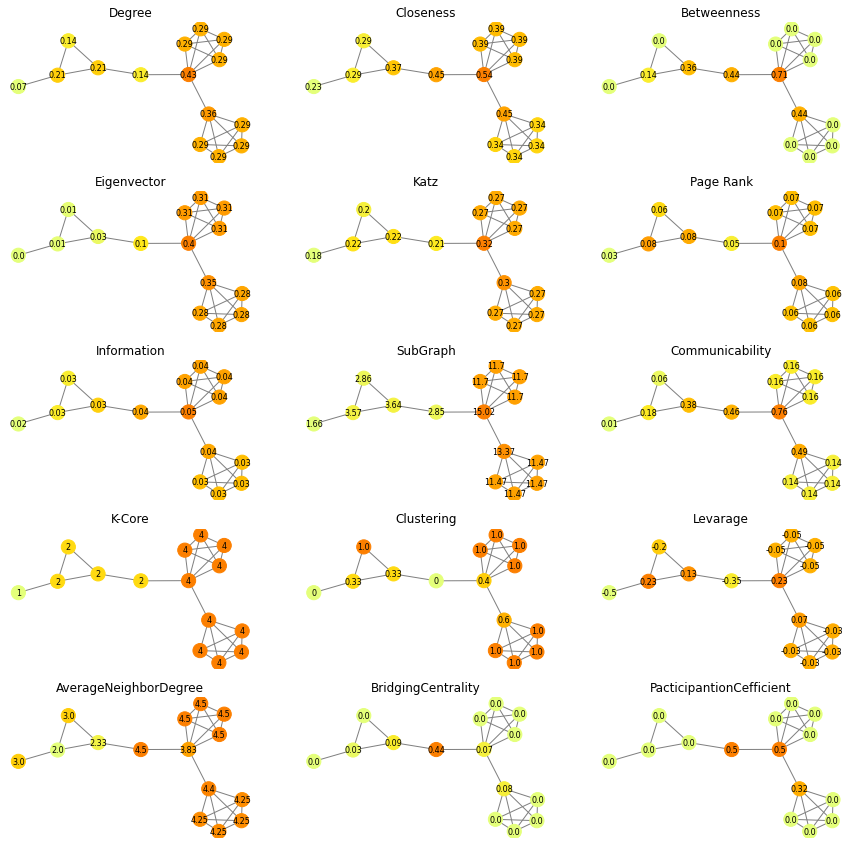

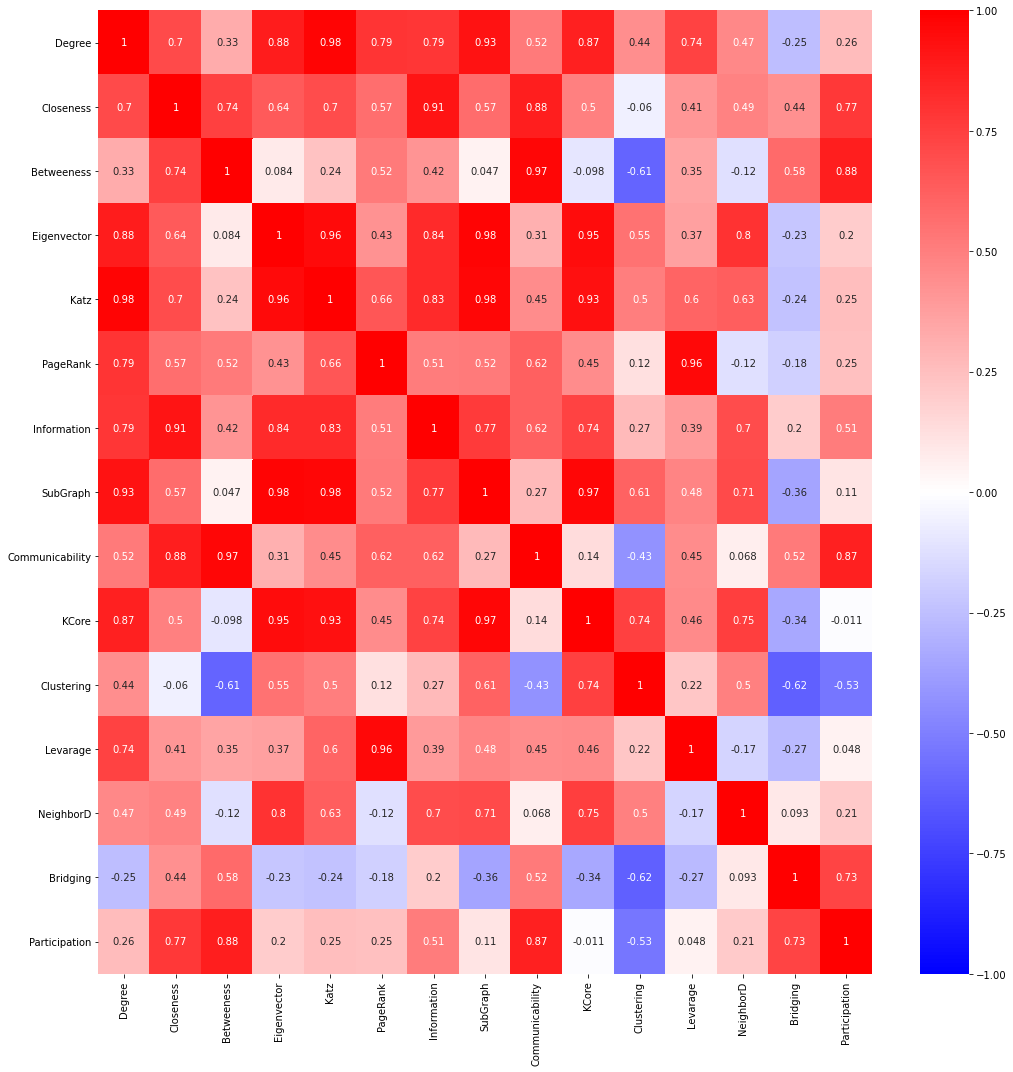

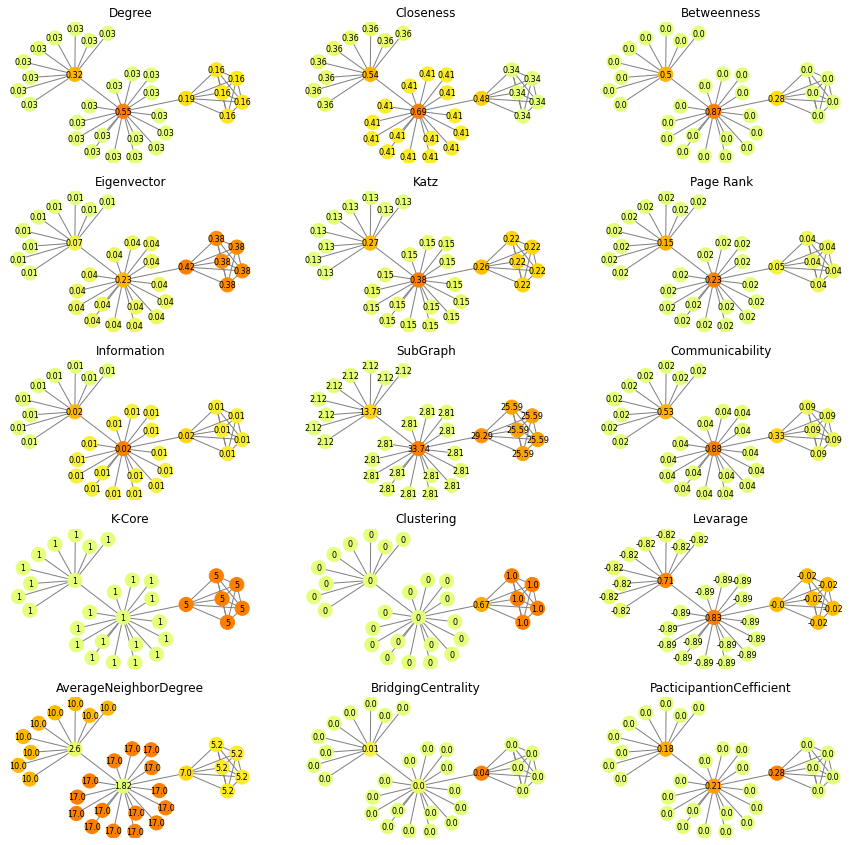

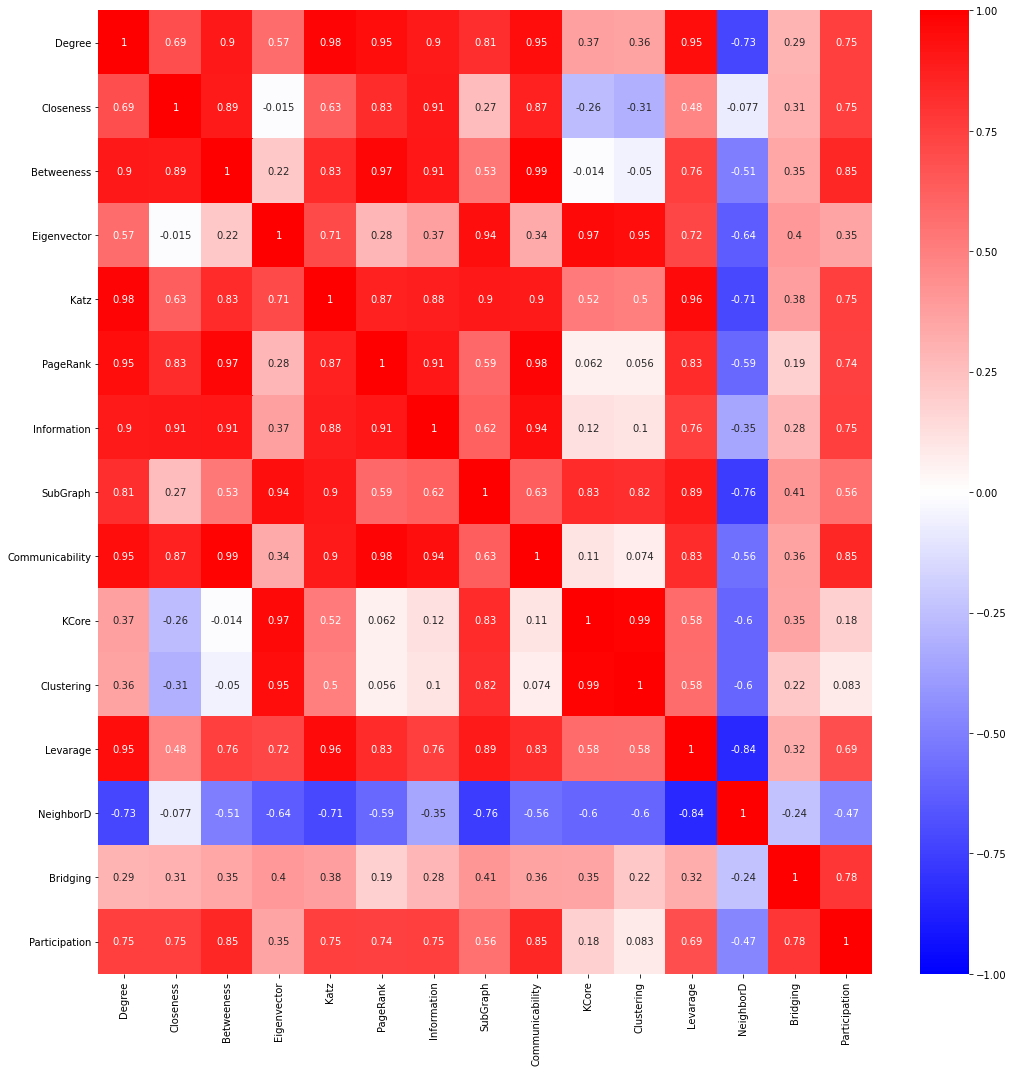

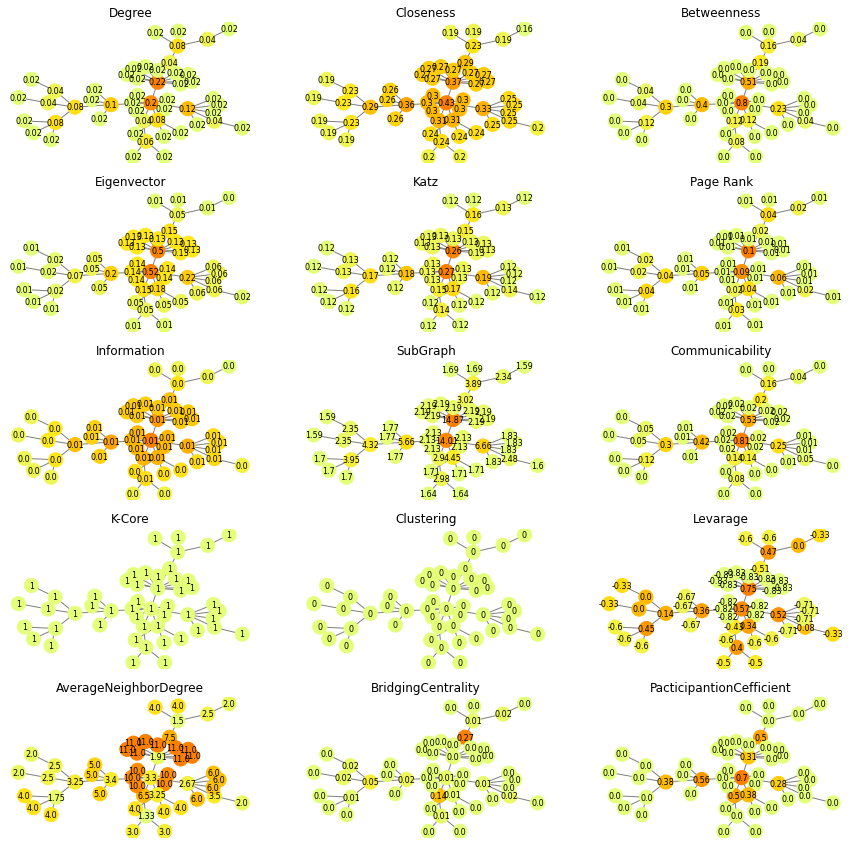

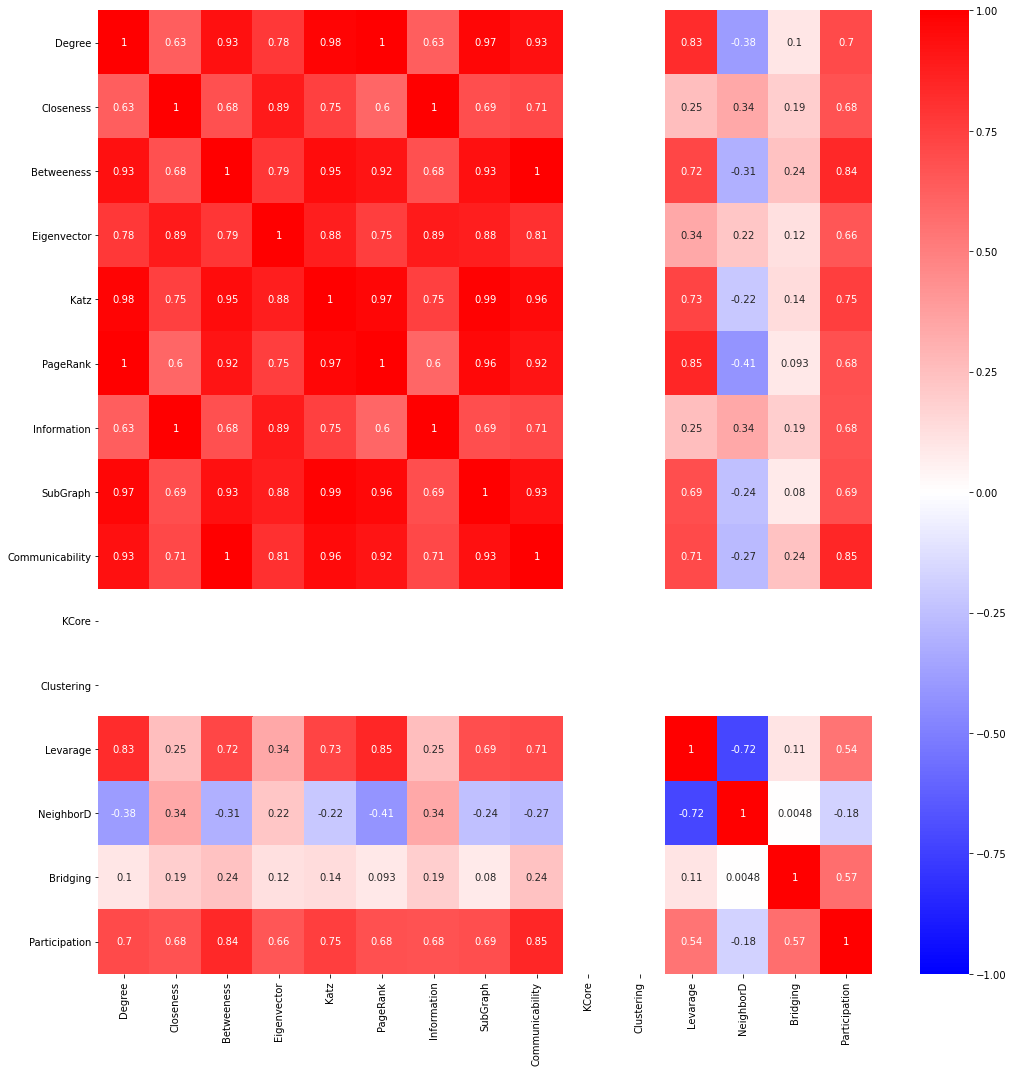

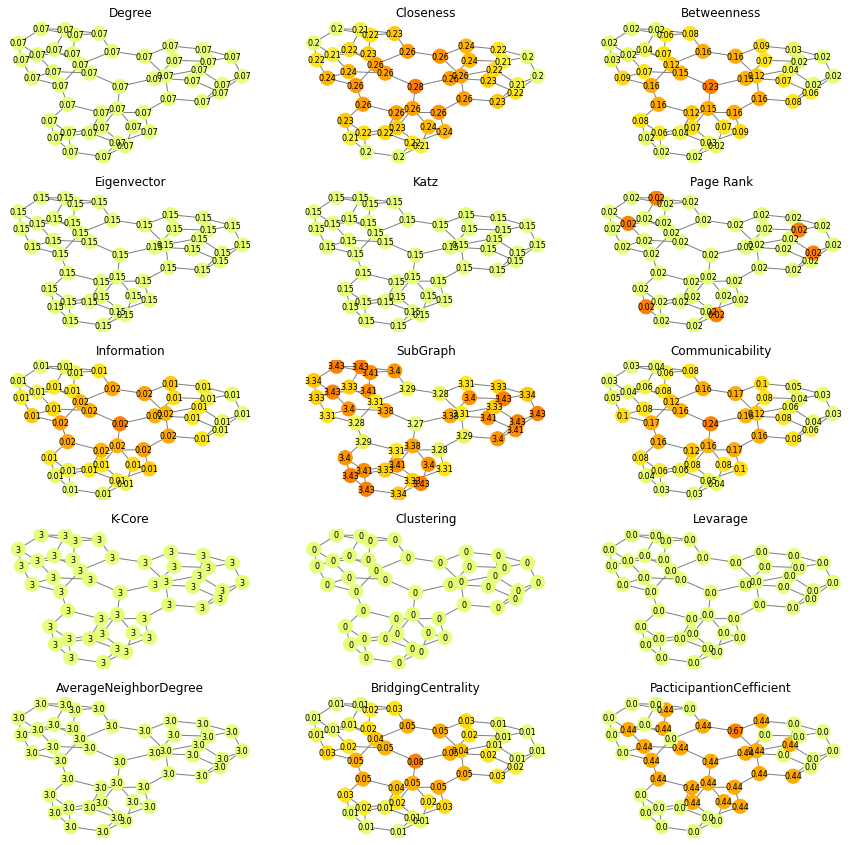

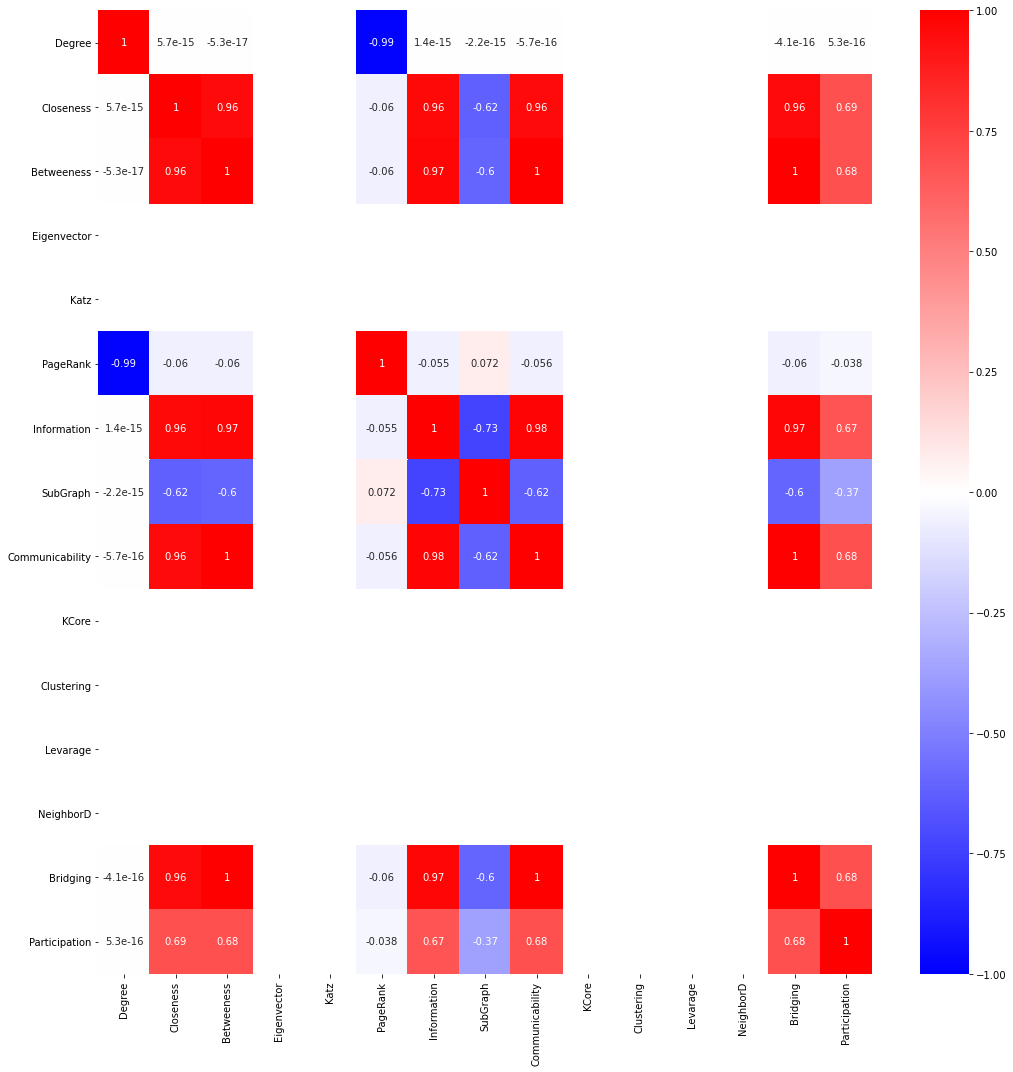

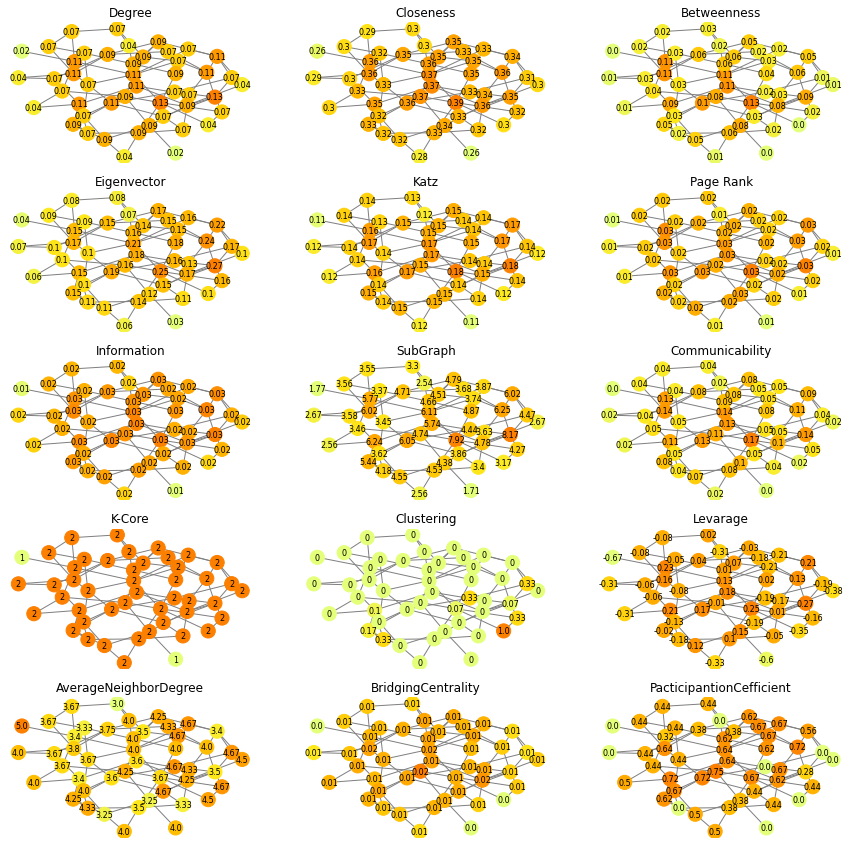

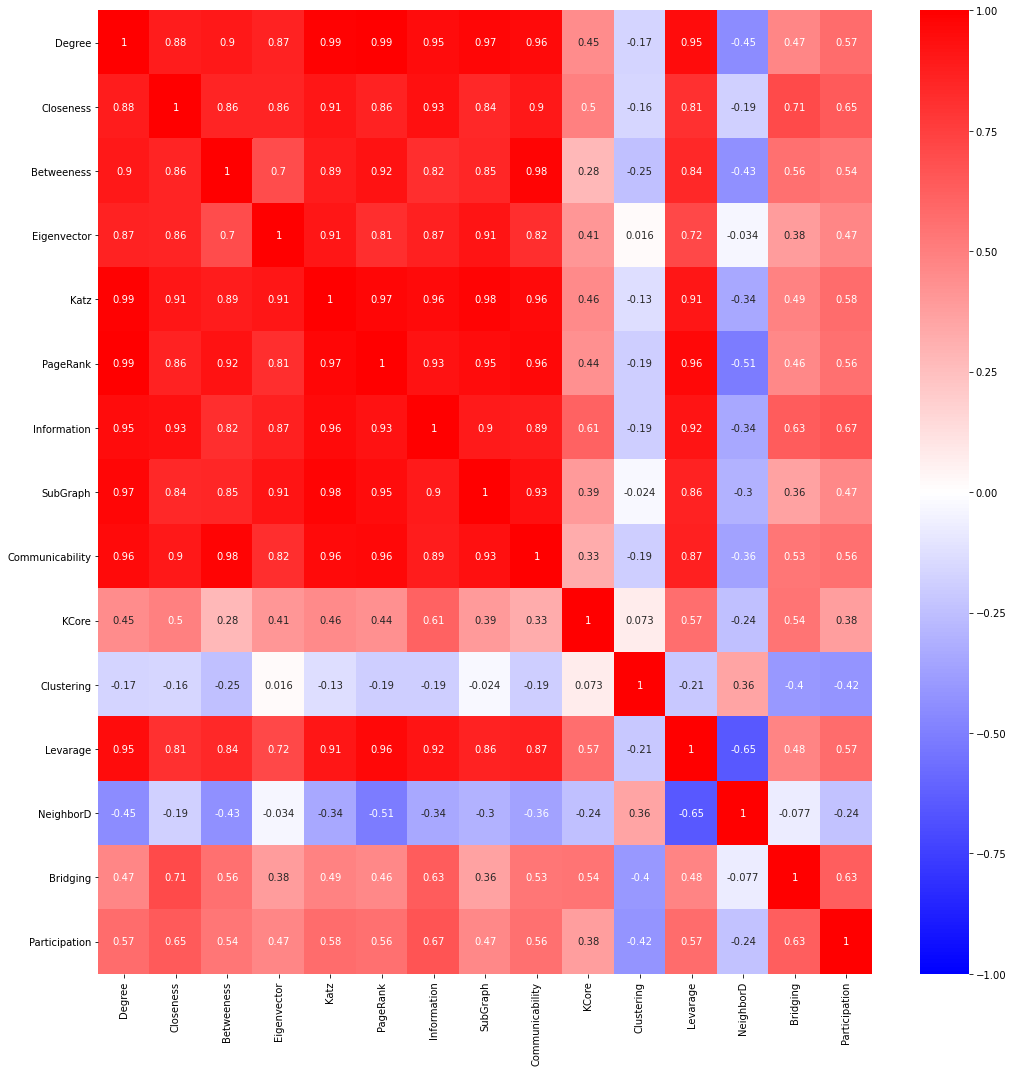

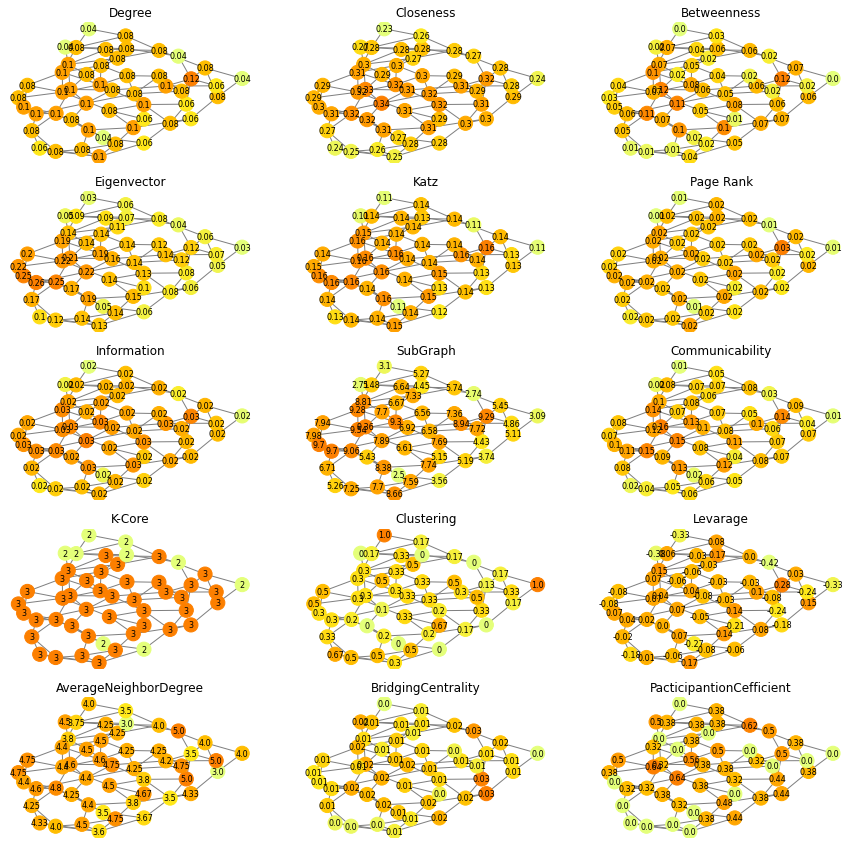

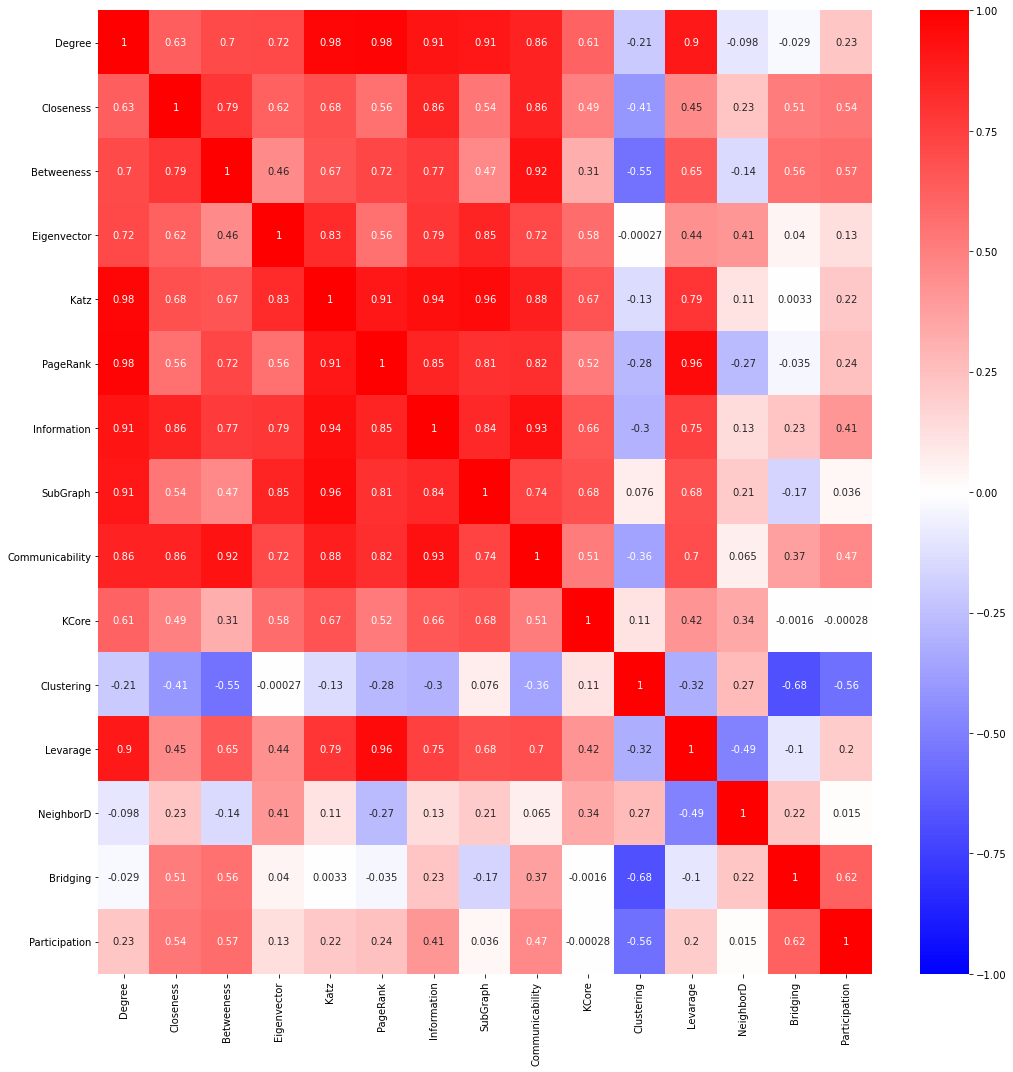

In [6]:
for net in visualNetworks:
    plotVisualMeasures(visualNetworks[net])